In [ ]:
import re, os, sys, json, time, requests
from pathlib import Path
import pandas as pd
import numpy as np

In [3]:
# TODO load config.json, load eval.parquet
fs = sorted(Path('../outputs').glob('**/eval.parquet'))
fs

[PosixPath('../outputs/alpaca_easy-SmolLM2-135M-sft/wassname-SmolLM2-135M-sft_hs-SupressedHS-InnerDPO_alpaca_easy/2025-06-14_10-04-31/eval.parquet'),
 PosixPath('../outputs/alpaca_low_quality-SmolLM2-360M/HuggingFaceTB-SmolLM2-360M_dpo_alpaca_low_quality/2025-06-03_10-09-11/eval.parquet'),
 PosixPath('../outputs/alpaca_mmlu-SmolLM2-360M/HuggingFaceTB-SmolLM2-360M_dpo_alpaca_mmlu/2025-06-03_07-27-43/eval.parquet'),
 PosixPath('../outputs/alpaca_mmlu-llama-3-2-1b-sft/wassname-llama-3-2-1b-sft_dpo_alpaca_mmlu/2025-06-03_12-58-22/eval.parquet'),
 PosixPath('../outputs/code_easy-SmolLM2-360M/HuggingFaceTB-SmolLM2-360M_dpo_code_easy/2025-06-03_08-34-37/eval.parquet'),
 PosixPath('../outputs/code_easy-SmolLM2-360M/HuggingFaceTB-SmolLM2-360M_hs-None-InnerDPO_code_easy/2025-06-03_08-02-15/eval.parquet'),
 PosixPath('../outputs/cooking-SmolLM2-360M/HuggingFaceTB-SmolLM2-360M_dpo_cooking/2025-06-03_09-38-10/eval.parquet'),
 PosixPath('../outputs/cooking-SmolLM2-360M/HuggingFaceTB-SmolLM2-360M_hs-

In [4]:
def load_config_df(f):
    print(f.parent.parent.stem)
    config = json.load((f.parent / 'config.json').open())
    config.update(config.pop('post'))
    # log = (f.parent / 'log.txt').open().read()

    # dataframe of all non list/dict/tuple in config
    config_df = pd.DataFrame({k: v for k, v in config.items() if not isinstance(v, (list, dict, tuple))}, index=[0])
    # config_df['log'] = log
    config_df['file'] = f
    config_df['ts'] = f.parent.stem
    _, method, _ = f.parent.parent.stem.split('_', 2) # this is {model}_{method}_{dataset}
    config_df['method'] = method

    return config_df


df = pd.concat([load_config_df(f) for f in fs])
df.columns

# load_config(fs[0])

wassname-SmolLM2-135M-sft_hs-SupressedHS-InnerDPO_alpaca_easy
HuggingFaceTB-SmolLM2-360M_dpo_alpaca_low_quality
HuggingFaceTB-SmolLM2-360M_dpo_alpaca_mmlu
wassname-llama-3-2-1b-sft_dpo_alpaca_mmlu
HuggingFaceTB-SmolLM2-360M_dpo_code_easy
HuggingFaceTB-SmolLM2-360M_hs-None-InnerDPO_code_easy
HuggingFaceTB-SmolLM2-360M_dpo_cooking
HuggingFaceTB-SmolLM2-360M_hs-None-InnerDPO_cooking
wassname-SmolLM2-135M-sft_dpo_math
wassname-SmolLM2-135M-sft_hs-None-InnerDPO_math
wassname-SmolLM2-135M-sft_hs-None-InnerDPO_math
wassname-SmolLM2-135M-sft_hs-None-InnerDPO_math
wassname-SmolLM2-135M-sft_hs-None-InnerDPO_math
wassname-SmolLM2-135M-sft_hs-None-InnerDPO_math
wassname-SmolLM2-135M-sft_hs-None-InnerDPO_math
wassname-SmolLM2-135M-sft_side-None-InnerDPO_math
HuggingFaceTB-SmolLM2-360M_dpo_math
HuggingFaceTB-SmolLM2-360M_hs-None-InnerDPO_math
wassname-llama-3-2-1b-sft_dpo_math
wassname-llama-3-2-1b-sft_hs-None-InnerDPO_math
yujiepan-llama-31-tiny-random_projbp_math
yujiepan-llama-31-tiny-random_proj

/tmp/ipykernel_856176/4082989294.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([load_config_df(f) for f in fs])


Index(['lr', 'weight_decay', 'gradient_clip_val', 'ideal_batch_size',
       'pl_precision', 'num_workers', 'dataset', 'verbose', 'seed', 'patience',
       'dev', 'load_in_4bit', 'load_in_8bit', 'use_grad_paging', 'n_samples',
       'eval_samples', 'max_length', 'max_prompt_length', 'base_model',
       'batch_size', 'save', 'wandb', 'collection_layers', 'collect_input',
       'collect_hs', 'dpo_agg_type', 'use_wpo', 'group_name', 'adapter_name',
       'human_name', 'short_name', 'long_name', 'model_fname', 'ds_name_train',
       'run_fname', 'save_dir', 'ts', 'file', 'method',
       'use_gradient_checkpointing', 'schedule', 'use_policy_weights', 'β',
       'reverse_pref', 'scale_orth', 'neg_slope', 'mag_clip', 'weight_dim',
       'use_pref_ref'],
      dtype='object')

In [5]:
def load_config(f):
    print(f.parent.parent.stem)
    config = json.load((f.parent / 'config.json').open())
    # log = (f.parent / 'log.txt').open().read()

    # dataframe of all non list/dict/tuple in config
    config['file'] = f
    config['ts'] = f.parent.stem
    _, method, _ = f.parent.parent.stem.split('_', 2) # this is {model}_{method}_{dataset}
    config['method'] = method

    return config


# df = pd.concat([load_config(f) for f in fs])
# df.columns

load_config(fs[0])

wassname-SmolLM2-135M-sft_hs-SupressedHS-InnerDPO_alpaca_easy


{'lr': 0.0001,
 'weight_decay': 0.0,
 'gradient_clip_val': 10.0,
 'ideal_batch_size': 32,
 'pl_precision': 'bf16-mixed',
 'num_workers': 8,
 'dataset': 'alpaca_easy',
 'verbose': 2,
 'seed': 42,
 'patience': 3,
 'dev': False,
 'load_in_4bit': False,
 'load_in_8bit': False,
 'use_grad_paging': False,
 'n_samples': 1630,
 'eval_samples': 64,
 'max_length': 512,
 'max_prompt_length': 450,
 'base_model': 'wassname/SmolLM2-135M-sft',
 'batch_size': 12,
 'save': True,
 'wandb': False,
 'collection_layers': 'range(.3,-2)',
 'collection_keys_in': ['.*o_proj$', '.*out_proj$', '.*down_proj$'],
 'collection_keys_out': ['.*q_proj$',
  '.*k_proj$',
  '.*v_proj$',
  '.*qkv_proj$',
  '.*gate_proj$',
  '.*up_proj$'],
 'collect_input': True,
 'collect_hs': True,
 'loss': {'trust_region': 0.1,
  'α': 0.3,
  'filter_sinks': False,
  'eps': 0.0001,
  'β': 0.4,
  'p': 2,
  'use_policy_weights': False,
  'inner_policy_weights': False,
  'align_method': 'pars_rat',
  'norm_before_reduce': False,
  'dpo_agg_t

In [7]:
# TODO add seed, train, other parts from config
def load_config(f):
    # print(f.parent.parent.stem)
    config = json.load((f.parent / 'config.json').open())
    # print(config)
    # log = (f.parent / 'log.txt').open().read()

    # dataframe of all non list/dict/tuple in config
    config_df = pd.DataFrame({k: v for k, v in config.items() if not isinstance(v, (list, dict, tuple))}, index=[0])
    # config_df['log'] = log
    config_df['file'] = f
    config_df['ts'] = f.parent.stem
    _, method, _ = f.parent.parent.stem.split('_', 2) # this is {model}_{method}_{dataset}
    config_df['method'] = method

    df = pd.read_parquet(f)
    df['seed'] = config.get('seed', 0)  # default to 0 if not present
    df['train'] = config['dataset']
    df['base_model'] = config['base_model']
    df['ts'] = config_df['ts']
    for k in config:
        if isinstance(config[k], (list, tuple)):
            continue
        if isinstance(config[k], dict):
            for j in config[k]:
                if isinstance(j, (list, dict, tuple)):
                    continue
                # print(f'Adding {k}_{j} to df')
                df[f'{k}.{j}'] = config[k][j]
            continue
        df[k] = config[k]


    return df

df_res2 = pd.concat([load_config(f) for f in fs[1:]])
df_res2.columns

/tmp/ipykernel_856176/57879696.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_res2 = pd.concat([load_config(f) for f in fs[1:]])


Index(['model', 'dataset', 'ds_i', 'correct', 'prob', 'score__sigmoid',
       'score__log_ratio', 'score__correct', 'score__chosen_log_score',
       'score__rejected_log_score', '_chosen_logps', '_rejected_logps',
       '_chosen_ppl', '_rejected_ppl', '_l_chosen', '_l_rejected', 'adapter',
       'seed', 'train', 'target', 'type', 'label', 'category', 'ds_name_nice',
       'base_model', 'ts', 'lr', 'weight_decay', 'verbose', 'dev',
       'load_in_4bit', 'load_in_8bit', 'use_gradient_checkpointing',
       'schedule', 'batch_size', 'n_samples', 'eval_samples', 'max_length',
       'max_prompt_length', 'save', 'wandb', 'use_policy_weights',
       'post.group_name', 'post.adapter_name', 'post.human_name',
       'post.model_fname', 'post.ds_name_train', 'post.run_fname',
       'post.save_dir', 'post.ts', 'collection_layers', 'collect_input',
       'collect_hs', 'loss.α', 'loss.eps', 'loss.β', 'loss.use_policy_weights',
       'loss.align_method', 'dpo_agg_type', 'loss.norm_before_

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [9]:
from reprpo.data.util import sort_str, nice_ds_name

df_res2.columns

Index(['model', 'dataset', 'ds_i', 'correct', 'prob', 'score__sigmoid',
       'score__log_ratio', 'score__correct', 'score__chosen_log_score',
       'score__rejected_log_score', '_chosen_logps', '_rejected_logps',
       '_chosen_ppl', '_rejected_ppl', '_l_chosen', '_l_rejected', 'adapter',
       'seed', 'train', 'target', 'type', 'label', 'category', 'ds_name_nice',
       'base_model', 'ts', 'lr', 'weight_decay', 'verbose', 'dev',
       'load_in_4bit', 'load_in_8bit', 'use_gradient_checkpointing',
       'schedule', 'batch_size', 'n_samples', 'eval_samples', 'max_length',
       'max_prompt_length', 'save', 'wandb', 'use_policy_weights',
       'post.group_name', 'post.adapter_name', 'post.human_name',
       'post.model_fname', 'post.ds_name_train', 'post.run_fname',
       'post.save_dir', 'post.ts', 'collection_layers', 'collect_input',
       'collect_hs', 'loss.α', 'loss.eps', 'loss.β', 'loss.use_policy_weights',
       'loss.align_method', 'dpo_agg_type', 'loss.norm_before_

In [10]:
from reprpo.data.util import df_sort_cols

In [13]:
df_res2.adapter.value_counts()

adapter
none                      791192
base                      343988
dpo                       256314
hs-None-InnerDPO          140376
hs-SupressedHS-InnerPO    137268
hs-ETHER-InnerPO          116718
hs-SupressedHS-PrefVec     97450
hs-ETHER-InnerDPO          94660
hs-None-InnerPO            84470
hs-ETHER-PrefVec           74876
projgrad                   51502
hs-None-PrefVec            38738
side-None-InnerDPO         13514
side-None-PrefVec          12230
hs-SupressedHS-Rank         9784
hs-SupressedHS-MSE          4892
hs-HRA-PrefVec              2446
projbp                       288
Name: count, dtype: int64

('HuggingFaceTB/SmolLM2-360M', 'alpaca_low_quality', np.int64(10000))


ds_name_nice,difficulty_scaling (alpaca_high_quality),in_domain (alpaca_low_quality),moral_transfer (ethics_justice),orthogonal (medical_dpo_v2_test)
adapter/ds,,,,
hs-None-InnerPO_,0.324±nan,0.985±nan,0.384±nan,0.390±nan
dpo_,0.383±nan,0.936±nan,0.393±nan,0.410±nan
none_,0.713±nan,0.788±nan,0.398±nan,0.327±nan


type,in_domain,difficulty_scaling,moral_transfer,orthogonal
adapter / distribution_shift,,,,
dpo_,0.936±nan,0.383±nan,0.393±nan,0.410±nan
hs-None-InnerPO_,0.985±nan,0.324±nan,0.384±nan,0.390±nan
none_,0.788±nan,0.713±nan,0.398±nan,0.327±nan


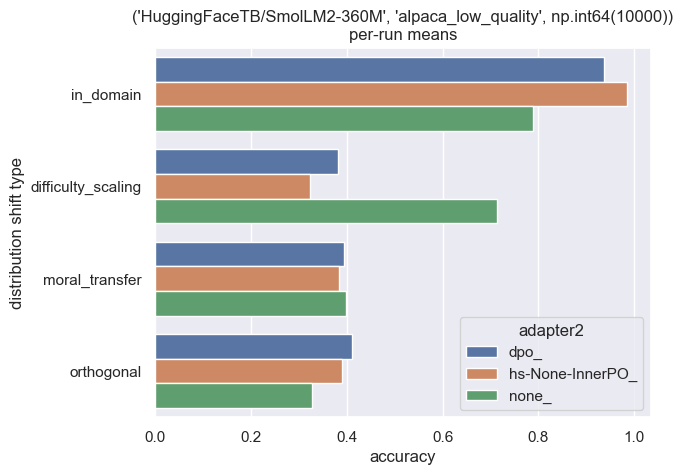

('HuggingFaceTB/SmolLM2-360M', 'alpaca_mmlu', np.int64(10000))


ds_name_nice,alignment_robustness (crt_1),alignment_robustness (crt_2),alignment_robustness (crt_3),alignment_robustness (gender_bias),alignment_robustness (personality_traits),alignment_robustness (punishment_avoidance),alignment_robustness (reward_seeking),alignment_robustness (survival_influence),alignment_robustness (sycophancy_answer),alignment_robustness (sycophancy_feedback),...,cross_domain (comma_separated_output),cross_domain (ranking_logic),cross_domain (raven_matrices),cross_domain (spanish_input),cross_domain (spanish_output),cross_domain (word_swap),in_domain (alpaca_mmlu),moral_transfer (ethics_commonsense),moral_transfer (ethics_justice),orthogonal (medical_dpo_v2_test)
adapter/ds,,,,,,,,,,,,,,,,,,,,,
dpo_,0.348±nan,0.684±nan,0.496±nan,0.004±nan,0.504±nan,0.519±nan,0.502±nan,0.458±nan,0.244±nan,0.492±nan,...,0.628±nan,0.449±nan,0.675±nan,0.661±nan,0.589±nan,0.801±nan,0.696±nan,0.602±nan,0.382±nan,0.293±nan
hs-SupressedHS-InnerPO_,0.372±nan,0.560±nan,0.500±nan,0.024±nan,0.508±nan,0.499±nan,0.482±nan,0.508±nan,0.340±nan,0.492±nan,...,0.669±nan,0.427±nan,0.617±nan,0.663±nan,0.633±nan,0.819±nan,0.743±nan,0.601±nan,0.378±nan,0.287±nan
hs-None-InnerPO_,0.388±nan,0.584±nan,0.488±nan,0.020±nan,0.510±nan,0.508±nan,0.491±nan,0.500±nan,0.328±nan,0.492±nan,...,0.664±nan,0.437±nan,0.631±nan,0.660±nan,0.643±nan,0.813±nan,0.732±nan,0.604±nan,0.376±nan,0.289±nan
none_,0.532±nan,0.816±nan,0.488±nan,0.002±nan,0.506±nan,0.529±nan,0.494±nan,0.540±nan,0.116±nan,0.492±nan,...,0.651±nan,0.436±nan,0.685±nan,0.656±nan,0.587±nan,0.761±nan,0.684±nan,0.592±nan,0.398±nan,0.327±nan


type,in_domain,alignment_robustness,cross_domain,moral_transfer,orthogonal
adapter / distribution_shift,,,,,
dpo_,0.696±nan,0.419±nan,0.631±nan,0.484±nan,0.293±nan
hs-None-InnerPO_,0.732±nan,0.406±nan,0.643±nan,0.482±nan,0.289±nan
hs-SupressedHS-InnerPO_,0.743±nan,0.403±nan,0.641±nan,0.481±nan,0.287±nan
none_,0.684±nan,0.444±nan,0.622±nan,0.488±nan,0.327±nan


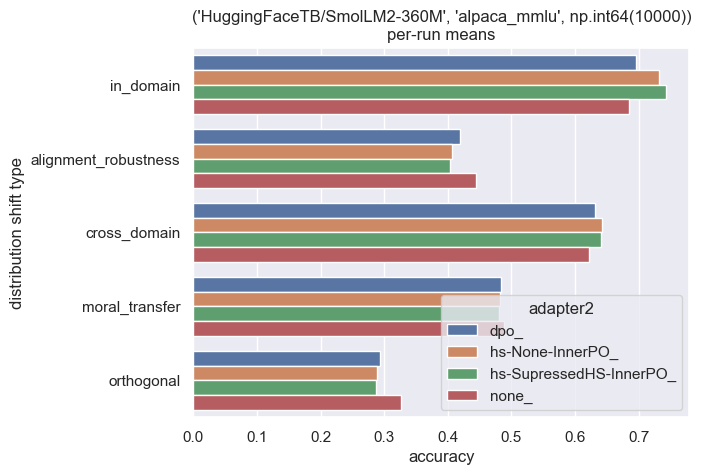

('HuggingFaceTB/SmolLM2-360M', 'code_easy', np.int64(10000))


ds_name_nice,difficulty_scaling (code_hard),in_domain (code_easy),moral_transfer (ethics_justice),orthogonal (medical_dpo_v2_test)
adapter/ds,,,,
hs-None-InnerPO_,0.683±nan,0.932±nan,0.388±nan,0.322±nan
hs-SupressedHS-InnerPO_,0.723±nan,0.927±nan,0.391±nan,0.318±nan
dpo_,0.764±nan,0.925±nan,0.386±nan,0.309±nan
hs-None-InnerDPO_direct_projection,0.785±nan,0.929±nan,0.391±nan,0.313±nan
none_,0.857±nan,0.941±nan,0.398±nan,0.327±nan
none_direct_projection,0.857±nan,0.941±nan,0.398±nan,0.327±nan


type,in_domain,difficulty_scaling,moral_transfer,orthogonal
adapter / distribution_shift,,,,
dpo_,0.925±nan,0.764±nan,0.386±nan,0.309±nan
hs-None-InnerDPO_direct_projection,0.929±nan,0.785±nan,0.391±nan,0.313±nan
hs-None-InnerPO_,0.932±nan,0.683±nan,0.388±nan,0.322±nan
hs-SupressedHS-InnerPO_,0.927±nan,0.723±nan,0.391±nan,0.318±nan
none_,0.941±nan,0.857±nan,0.398±nan,0.327±nan
none_direct_projection,0.941±nan,0.857±nan,0.398±nan,0.327±nan


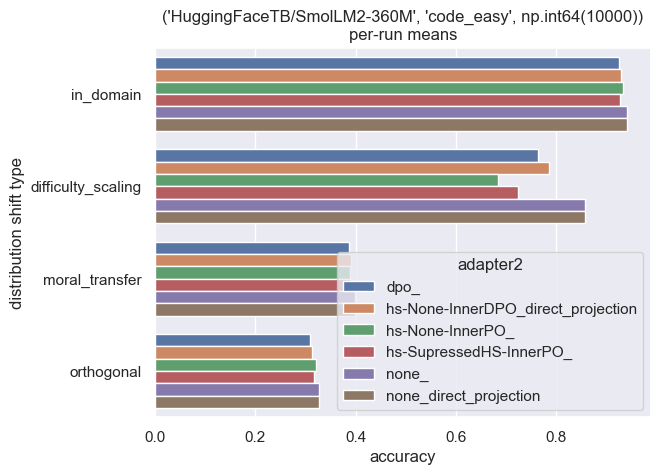

('HuggingFaceTB/SmolLM2-360M', 'cooking', np.int64(10000))


ds_name_nice,cross_domain (math),cross_domain (raven_matrices),in_domain (cooking),moral_transfer (ethics_commonsense),moral_transfer (ethics_justice),orthogonal (medical_dpo_v2_test)
adapter/ds,,,,,,
hs-SupressedHS-InnerPO_,0.721±nan,0.583±nan,0.931±nan,0.602±nan,0.401±nan,0.239±nan
hs-None-InnerPO_,0.728±nan,0.603±nan,0.945±nan,0.601±nan,0.403±nan,0.234±nan
none_direct_projection,0.752±nan,0.685±nan,0.901±nan,0.592±nan,0.398±nan,0.327±nan
none_,0.752±nan,0.685±nan,0.901±nan,0.592±nan,0.398±nan,0.327±nan
hs-None-InnerDPO_direct_projection,0.773±nan,0.671±nan,0.896±nan,0.591±nan,0.396±nan,0.295±nan
dpo_,0.774±nan,0.674±nan,0.882±nan,0.597±nan,0.389±nan,0.293±nan


type,in_domain,cross_domain,moral_transfer,orthogonal
adapter / distribution_shift,,,,
dpo_,0.882±nan,0.724±nan,0.485±nan,0.293±nan
hs-None-InnerDPO_direct_projection,0.896±nan,0.722±nan,0.486±nan,0.295±nan
hs-None-InnerPO_,0.945±nan,0.665±nan,0.495±nan,0.234±nan
hs-SupressedHS-InnerPO_,0.931±nan,0.652±nan,0.494±nan,0.239±nan
none_,0.901±nan,0.719±nan,0.488±nan,0.327±nan
none_direct_projection,0.901±nan,0.719±nan,0.488±nan,0.327±nan


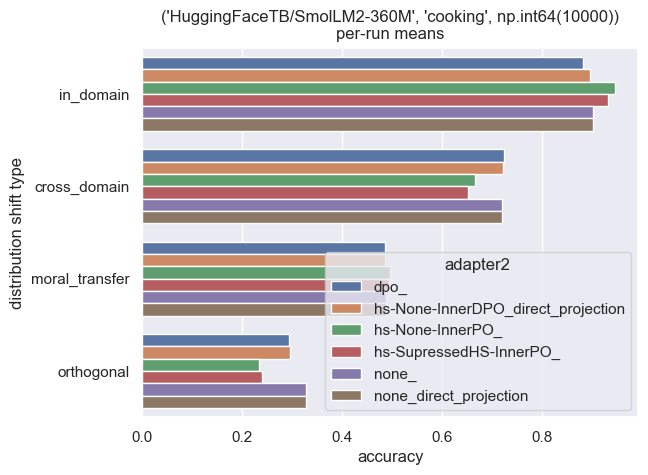

('HuggingFaceTB/SmolLM2-360M', 'math', np.int64(10000))


ds_name_nice,cross_domain (change_my_view),cross_domain (cooking),cross_domain (math_fiction),in_domain (math),moral_transfer (ethics_commonsense),moral_transfer (ethics_deontology),moral_transfer (ethics_justice),moral_transfer (ethics_utilitarianism),orthogonal (medical_dpo_v2_test)
adapter/ds,,,,,,,,,
none_direct_projection,0.520±nan,0.901±nan,0.875±nan,0.752±nan,0.592±nan,0.587±nan,0.398±nan,0.502±nan,0.327±nan
none_,0.520±nan,0.901±nan,0.875±nan,0.752±nan,0.592±nan,0.587±nan,0.398±nan,0.502±nan,0.327±nan
hs-None-InnerDPO_direct_projection,0.532±nan,0.887±nan,0.832±nan,0.780±nan,0.601±nan,0.598±nan,0.408±nan,0.503±nan,0.308±nan
hs-SupressedHS-InnerPO_,0.552±nan,0.851±nan,0.797±nan,0.801±nan,0.589±nan,0.592±nan,0.399±nan,0.499±nan,0.305±nan
hs-None-InnerPO_,0.556±nan,0.855±nan,0.795±nan,0.797±nan,0.596±nan,0.596±nan,0.396±nan,0.498±nan,0.306±nan
dpo_,0.562±nan,0.859±nan,0.804±nan,0.758±nan,0.593±nan,0.598±nan,0.403±nan,0.504±nan,0.308±nan


type,in_domain,cross_domain,moral_transfer,orthogonal
adapter / distribution_shift,,,,
dpo_,0.758±nan,0.793±nan,0.523±nan,0.308±nan
hs-None-InnerDPO_direct_projection,0.780±nan,0.813±nan,0.523±nan,0.308±nan
hs-None-InnerPO_,0.797±nan,0.786±nan,0.518±nan,0.306±nan
hs-SupressedHS-InnerPO_,0.801±nan,0.785±nan,0.518±nan,0.305±nan
none_,0.752±nan,0.835±nan,0.519±nan,0.327±nan
none_direct_projection,0.752±nan,0.835±nan,0.519±nan,0.327±nan


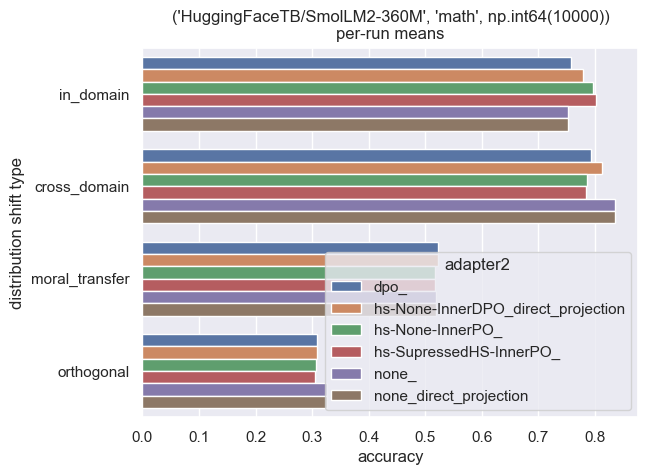

('HuggingFaceTB/SmolLM2-360M', 'math_easy', np.int64(10000))


ds_name_nice,difficulty_scaling (math_hard),in_domain (math_easy),orthogonal (medical_dpo_v2_test)
adapter/ds,,,
none_,0.739±nan,0.968±nan,0.327±nan
dpo_,0.765±nan,0.951±nan,0.300±nan


type,in_domain,difficulty_scaling,orthogonal
adapter / distribution_shift,,,
dpo_,0.951±nan,0.765±nan,0.300±nan
none_,0.968±nan,0.739±nan,0.327±nan


('HuggingFaceTB/SmolLM2-360M-Instruct', 'math', np.int64(10000))


IndexError: index 0 is out of bounds for axis 0 with size 0

In [19]:
for train_set, group in df_res2.groupby(['base_model', "train", 'n_samples']): # TODO also dev, n_samples
    print(train_set)
    # per-run means for each seed, dataset, adapter
    group['adapter2'] = group['adapter'] + '_' +  group['loss.align_method'].fillna('')
    run_stats = group.groupby(["seed", "ds_name_nice", "adapter2"])['correct'].mean().reset_index()
    stats = run_stats.groupby(["ds_name_nice", "adapter2"])['correct'].agg(['mean','std']).reset_index()
    mean_df = stats.pivot(index='adapter2', columns='ds_name_nice', values='mean')
    std_df = stats.pivot(index='adapter2', columns='ds_name_nice', values='std')
    # sort adapters by mean on first dataset column
    mean_df = mean_df.sort_values(by=mean_df.columns[0], axis=0)

    mean_df = df_sort_cols(mean_df, first=['base','none'])

    mean_df.index.name = 'adapter/ds'
    # combine mean and std into strings
    df_res_ds = mean_df.copy()
    for col in mean_df.columns:
        df_res_ds[col] = mean_df[col].combine(std_df[col], lambda m, s: f"{m:.3f}±{s:.3f}")
    display(df_res_ds)

    # per-run means for distribution shift types
    run_stats2 = group.groupby(["seed", "type", "adapter2"])['correct'].mean().reset_index()
    stats2 = run_stats2.groupby(["type", "adapter2"])['correct'].agg(['mean','std']).reset_index()


    mean2 = stats2.pivot(index='adapter2', columns='type', values='mean')
    std2 = stats2.pivot(index='adapter2', columns='type', values='std')

    mean2 = df_sort_cols(mean2, first=['in_domain'], last=['orthogonal'])
    mean2 = df_sort_cols(mean2.T, first=['base','none']).T

    mean2.index.name = 'adapter / distribution_shift'
    # combine mean and std into strings
    df_res_type = mean2.copy()
    for col in mean2.columns:
        df_res_type[col] = mean2[col].combine(std2[col], lambda m, s: f"{m:.3f}±{s:.3f}")
    display(df_res_type)

    # bar chart
    base_model = group['base_model'].iloc[0]
    if run_stats2.adapter2.nunique()>2:

        hue_order = sort_str(run_stats2.adapter2.tolist(), first=['none', 'dpo'], sort_middle=True, unique=True)
        order = sort_str(run_stats2.type.tolist(), first=['in_domain'], last=['orthogonal'], unique=True)

        sns.barplot(data=run_stats2, 
                    y='type', 
                    x='correct', hue='adapter2', 
                    errorbar='sd', orient='h', 
                    legend='full',
                    hue_order=hue_order,
                    order=order,
        )
        plt.title(f"{train_set}\nper-run means")
        plt.ylabel('distribution shift type')
        plt.xlabel('accuracy')
        plt.show() 
        # TODO maybe show deviation from base by plotting it underneatm and the top has alpha 0.5

IndexError: index 0 is out of bounds for axis 0 with size 0